In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:,2:]
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [2]:
from sklearn.tree import export_graphviz
export_graphviz(
    tree_clf,
    out_file='iris_tree.dot',
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

In [3]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [4]:
tree_clf.predict([[5, 1.5]])

array([1])

In [5]:
from sklearn.datasets import make_moons

In [6]:
import matplotlib.pyplot as plt

# parte 1

In [7]:
X, y = make_moons(n_samples=10000, noise=0.4)

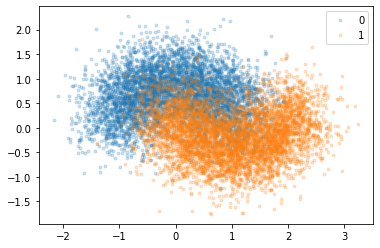

In [8]:
plt.plot(*X[y == 0].T, '.', label=0, alpha=.2)
plt.plot(*X[y == 1].T, '.', label=1, alpha=.2)
plt.legend()
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=.2, random_state=42, stratify=y)

In [10]:
import numpy as np
np.log2(y_train.size)

12.965784284662087

In [11]:
y_train.size * .01

80.0

In [12]:
from sklearn.model_selection import RandomizedSearchCV
from pandas import Series
from scipy.stats import uniform, randint

In [13]:
def test_params(param_grid):
    tree_clf = DecisionTreeClassifier(random_state=42)
    clf = RandomizedSearchCV(tree_clf, param_grid,scoring='accuracy', random_state=42, n_iter=250)
    clf.fit(X_train, y_train)
    clf.best_params_['score'] = clf.best_score_ * 100
    print(Series(clf.best_params_))
    del clf.best_params_['score']
    
    return clf.best_estimator_, clf.best_params_

In [14]:
clf, params = test_params({
    'max_depth': randint(1, 200),
    'min_samples_split': uniform(0,1),
    'min_samples_leaf': uniform(0,.5),
})

max_depth            58.000000
min_samples_leaf      0.015250
min_samples_split     0.037348
score                85.500000
dtype: float64


In [15]:
clf.score(X_test, y_test)

0.8645

# parte 2

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.base import clone
from numpy.random import choice
from scipy.stats import mode

In [17]:
DecisionTreeClassifier(random_state=42, **params).fit(X_train, y_train).score(X_test, y_test)

0.8645

In [22]:
clf = DecisionTreeClassifier(
    random_state=42, max_depth=58, min_samples_leaf=0.015250, min_samples_split=0.037348
)

arvores = [
    clone(clf).fit(X_train[index], y_train[index])
    for index in (choice(np.arange(y_train.size), 160, replace=False) for _ in range(1000))
]

predictions = np.array([arvore.predict(X_test) for arvore in arvores])

accuracy_score(mode(predictions).mode[0], y_test)

0.8725

In [60]:
arvores = [
    DecisionTreeClassifier().fit(X_train[index], y_train[index])
    for index in (choice(np.arange(y_train.size), 160, replace=False) for _ in range(1000))
]

predictions = np.array([arvore.predict(X_test) for arvore in arvores])

accuracy_score(mode(predictions).mode[0], y_test)

0.8695

In [23]:
from sklearn.ensemble import BaggingClassifier

In [54]:
bag_clr = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=1000,
    max_samples=0.01,
    bootstrap=True,
    n_jobs=-1)

In [55]:
bag_clr.fit(X_train , y_train)
y_pred = bag_clr.predict(X_test)

In [56]:
accuracy_score(y_pred, y_test)

0.8725

In [59]:
bag_clr = BaggingClassifier(
    DecisionTreeClassifier(random_state=42, max_depth=58, min_samples_leaf=0.015250, min_samples_split=0.037348),
    n_estimators=500,
    max_samples=0.1,
    bootstrap=True,
    n_jobs=-1)

bag_clr.fit(X_train , y_train)
y_pred = bag_clr.predict(X_test)
accuracy_score(y_pred, y_test)

0.7905